## **RANDU**

The LCG (*linear congruential generator*) **RANDU** is defined by the following
recurence (over the range of integers $1, ... , 2^{31} − 1$):

$x_i = 65539x_{i−1}$ mod $2^{31}$ \\
and $u_i = x_i/2^{31}$ ∈ $(0, 1)$. \\
**RANDU** is a notoriously bad generator.

In [98]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [99]:
def rec(x_i):
  return (65539*x_i)%(2**31)

def RANDU(i):
  x_i=1
  for j in range(i):
    x_i=rec(x_i)
  return x_i/(2**31)

In [100]:
L=[]
for i in range(2*10**4):
  L.append(RANDU(i))

In [101]:
u_i=[]
u_i_1=[]

for i in range(len(L)):
  if L[i]<=0.51 and L[i]>= 0.5:
    u_i_1.append(L[i])
    u_i.append(L[i+1])

### Scatter plot of $u_i$ as a function of $u_{i-1}$

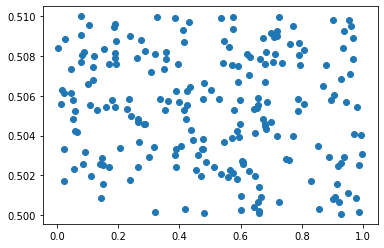

In [102]:
plt.scatter(u_i, u_i_1)

### 3D plot of the triples ($u_i$, $u_{i−1}$, $u_{i−2}$) 

In [103]:
def plot3D(L):
  ax = plt.axes(projection ="3d")
  ax.scatter3D(L[:-2], L[1:-1], L[2:])
  plt.show()

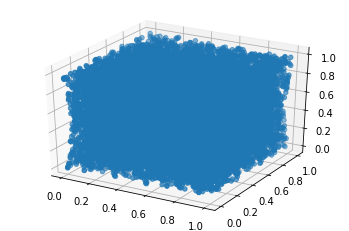

In [104]:
plot3D(L)

## Improved Box-Muller


The improved Box-Muller algorithm samples two unit Gaussian variates as
follows:

+ Repeat: $U_1, U_2 ∼ \mathcal{U}[−1, 1]$ until $U_1^2+U_2^2 ≤ 1$.

+ Return $X=U_1\sqrt{-2(logS)/S}$ and $Y=U_2\sqrt{-2(logS)/S}$, where $S=U_1^2+U_2^2$.




### Comparison with the standard Box-Muller algorithm

In [105]:
def improved_Box_Muller():
  S=2
  while S > 1:
    U_1=np.random.uniform(-1,1)
    U_2=np.random.uniform(-1,1)
    S=U_1**2+U_2**2
  X=U_1*np.sqrt(-2*np.log(S)/S)
  Y=U_2*np.sqrt(-2*np.log(S)/S)
  return X, Y

In [106]:
X,Y=improved_Box_Muller()

In [107]:
def generate_imp_Box_Muller(n_sample):
  L=[]
  for i in range(n_sample):
    X,Y=improved_Box_Muller()
    L.append(X); L.append(Y),
  return L

[]

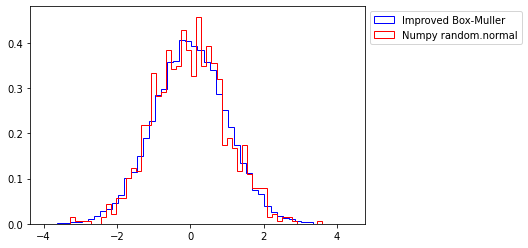

In [108]:
output=generate_imp_Box_Muller(10000)
plt.hist(output, density=True, stacked=True, histtype='step', bins=50, color='blue', label='Improved Box-Muller')
plt.hist(np.random.normal(0, 1, 1000), density=True, stacked=True, histtype='step', bins=50, color='red', label='Numpy random.normal')
plt.legend(bbox_to_anchor=(1, 1))
plt.plot()